In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-trends-a-guide-to-leveraging-dataset/ecommerce_product_dataset.csv


# Import Data

In [2]:
data = pd.read_csv('/kaggle/input/e-commerce-trends-a-guide-to-leveraging-dataset/ecommerce_product_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      1000 non-null   int64  
 1   ProductName    1000 non-null   object 
 2   Category       1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Rating         1000 non-null   float64
 5   NumReviews     1000 non-null   int64  
 6   StockQuantity  1000 non-null   int64  
 7   Discount       1000 non-null   float64
 8   Sales          1000 non-null   int64  
 9   DateAdded      1000 non-null   object 
 10  City           1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [3]:
data.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [4]:
data.shape

(1000, 11)

In [5]:
data['DateAdded'] = pd.to_datetime(data['DateAdded'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ProductID      1000 non-null   int64         
 1   ProductName    1000 non-null   object        
 2   Category       1000 non-null   object        
 3   Price          1000 non-null   float64       
 4   Rating         1000 non-null   float64       
 5   NumReviews     1000 non-null   int64         
 6   StockQuantity  1000 non-null   int64         
 7   Discount       1000 non-null   float64       
 8   Sales          1000 non-null   int64         
 9   DateAdded      1000 non-null   datetime64[ns]
 10  City           1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 86.1+ KB


In [6]:
data.describe()

,ProductID,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
mean,500.500000,253.77551,3.025600,2498.753000,495.395000,0.251640,1011.037000,2023-12-10 16:06:14.400000
min,1.000000,10.11000,1.000000,3.000000,0.000000,0.000000,0.000000,2023-06-14 00:00:00
25%,250.750000,133.09250,2.100000,1201.750000,241.750000,0.130000,502.000000,2023-09-09 00:00:00
50%,500.500000,251.31000,3.100000,2476.000000,505.000000,0.250000,998.000000,2023-12-05 12:00:00
75%,750.250000,375.82750,4.000000,3797.500000,743.500000,0.380000,1540.000000,2024-03-09 00:00:00
max,1000.000000,499.74000,5.000000,4994.000000,993.000000,0.500000,1997.000000,2024-06-11 00:00:00
std,288.819436,141.40362,1.151004,1463.241871,292.799253,0.146455,582.113466,NaN


In [7]:
data.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [8]:
data.value_counts('ProductName')

ProductName
Biography          22
Mountain Bike      19
Throw Blanket      18
Denim Jacket       17
Eau de Toilette    15
                   ..
Rain Jacket         5
Winter Coat         5
Cuticle Oil         5
Pillar Candle       4
Fantasy Book        4
Name: count, Length: 100, dtype: int64

In [9]:
len(pd.unique(data['ProductName']))

100

In [10]:
data.value_counts('Category')

Category
Art and crafting materials    40
Makeup                        40
Vitamins and supplements      40
Underwear                     40
Toys & Games                  40
Socks                         40
Skin care                     40
Posters and artwork           40
Perfume and cologne           40
Nail care                     40
Motor vehicle parts           40
Mobile phone accessories      40
Home & Kitchen                40
Bath and body                 40
Electronics                   40
Drinkware                     40
Cookware                      40
Coats and jackets             40
Clothing                      40
Candles                       40
Books                         40
Blankets                      40
Bicycles                      40
Bedsheets                     40
Wine                          40
Name: count, dtype: int64

In [11]:
data[data['City']=='Queens']

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
160,161,Board Game,Toys & Games,242.38,2.4,2343,16,0.21,60,2024-02-29,Queens
222,223,Multivitamin,Vitamins and supplements,224.92,3.9,3811,577,0.30,931,2023-09-24,Queens
296,297,Lipstick,Makeup,61.79,5.0,2148,7,0.02,1528,2024-03-17,Queens
410,411,Canvas,Art and crafting materials,251.24,3.3,3802,81,0.22,1710,2023-10-17,Queens
526,527,White Wine,Wine,281.15,3.0,661,424,0.43,1449,2024-03-17,Queens
595,596,Knee-High Socks,Socks,400.89,2.5,698,75,0.28,1822,2023-06-29,Queens
672,673,Canvas Print,Posters and artwork,301.13,2.6,4683,857,0.01,1887,2023-10-30,Queens
762,763,Dutch Oven,Cookware,96.79,1.0,687,20,0.34,1894,2023-11-03,Queens
791,792,Grill Pan,Cookware,468.05,4.6,3960,698,0.44,1963,2023-12-14,Queens


In [12]:
data[data['ProductName']=='Headphones']

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
5,6,Headphones,Electronics,93.56,1.3,2435,600,0.48,241,2023-09-21,Louisville
11,12,Headphones,Electronics,90.98,1.1,2568,343,0.20,647,2024-04-10,Mesa
12,13,Headphones,Electronics,107.43,3.8,4514,288,0.30,1513,2023-10-25,Palm Bay
15,16,Headphones,Electronics,359.49,4.0,502,766,0.13,794,2023-11-18,Hartford
16,17,Headphones,Electronics,64.34,2.8,863,742,0.24,1020,2024-03-08,Palm Bay
18,19,Headphones,Electronics,151.98,1.6,2625,681,0.40,1976,2024-01-30,Charlotte
21,22,Headphones,Electronics,90.68,3.1,4413,676,0.35,1257,2023-12-23,Austin
28,29,Headphones,Electronics,406.66,2.4,1734,819,0.47,1959,2024-02-05,Providence


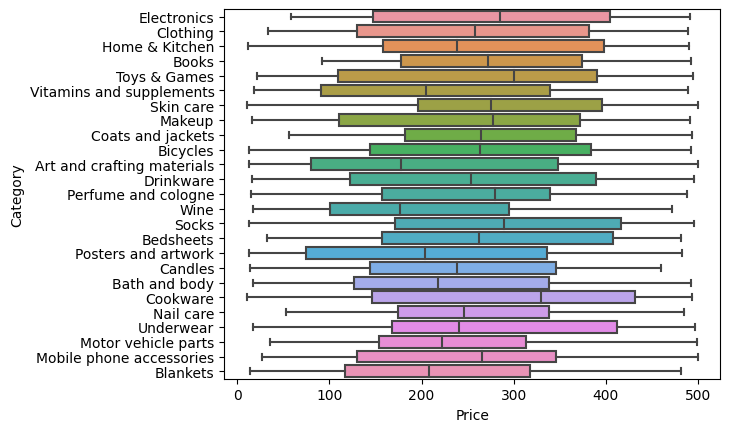

In [13]:
sns.boxplot(data = data, x = 'Price', y = 'Category')
plt.show()

-- Check na

In [14]:
data.isna().sum()

ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
City             0
dtype: int64

In [15]:
data.select_dtypes(['number','datetime']).head()

,ProductID,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
0,1,400.31,1.7,3772,20,0.08,466,2023-11-10
1,2,235.03,2.3,2919,663,0.33,1332,2023-09-28
2,3,417.90,1.8,1184,459,0.31,252,2023-10-20
3,4,152.70,3.4,2047,475,0.49,1806,2023-12-05
4,5,394.74,1.8,1267,831,0.23,1508,2023-08-10


In [16]:
data['YearAdded'] = data['DateAdded'].dt.year
data['MonthAdded'] = data['DateAdded'].dt.month
data['WeekDayAdded'] = data['DateAdded'].dt.weekday
data.select_dtypes(['number','datetime']).head()

,ProductID,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,YearAdded,MonthAdded,WeekDayAdded
0,1,400.31,1.7,3772,20,0.08,466,2023-11-10,2023,11,4
1,2,235.03,2.3,2919,663,0.33,1332,2023-09-28,2023,9,3
2,3,417.90,1.8,1184,459,0.31,252,2023-10-20,2023,10,4
3,4,152.70,3.4,2047,475,0.49,1806,2023-12-05,2023,12,1
4,5,394.74,1.8,1267,831,0.23,1508,2023-08-10,2023,8,3


## Seasonal Tends

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


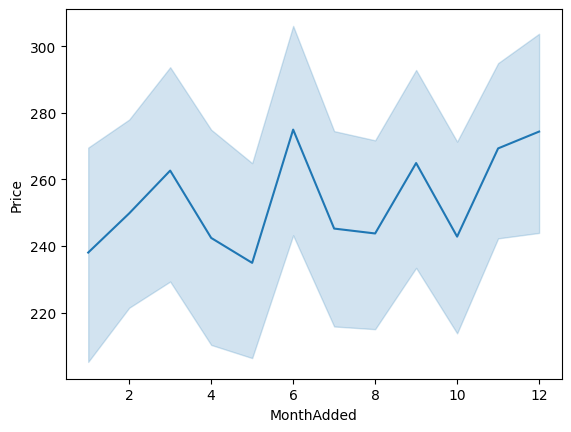

In [17]:
sns.lineplot(data=data, x='MonthAdded', y = 'Price')
plt.show()

-> Show seasonal price trend: Feb, Vilentines day; March, spring break; June, summer break/graduation; Sept, start school; Nov, Thanksgiving; Dec, Christmas.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


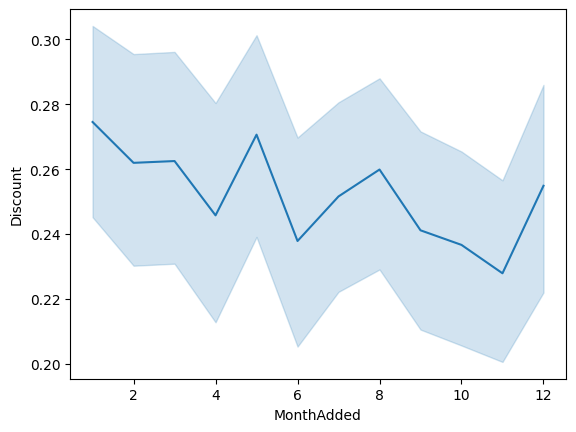

In [18]:
sns.lineplot(data=data, x='MonthAdded', y = 'Discount')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


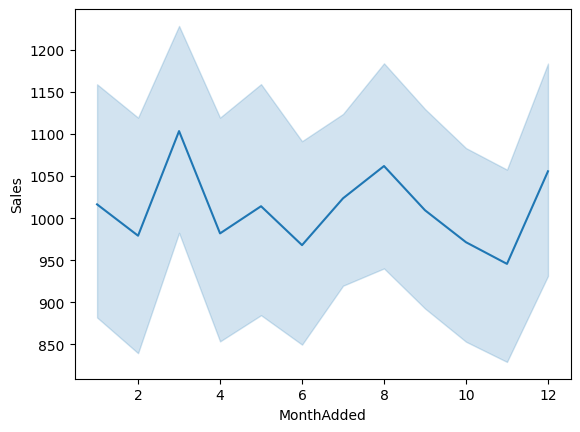

In [19]:
sns.lineplot(data=data, x='MonthAdded', y = 'Sales')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


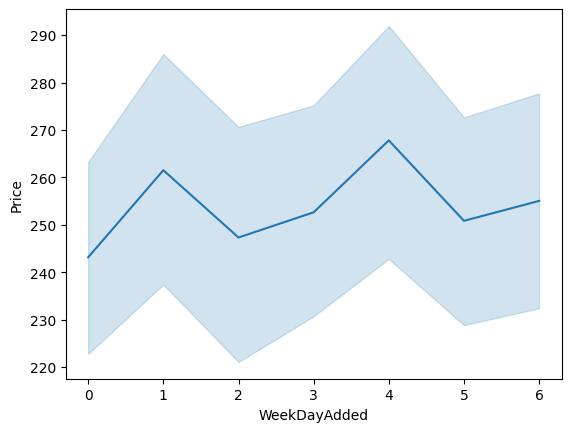

In [20]:
sns.lineplot(data=data, x='WeekDayAdded', y = 'Price')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


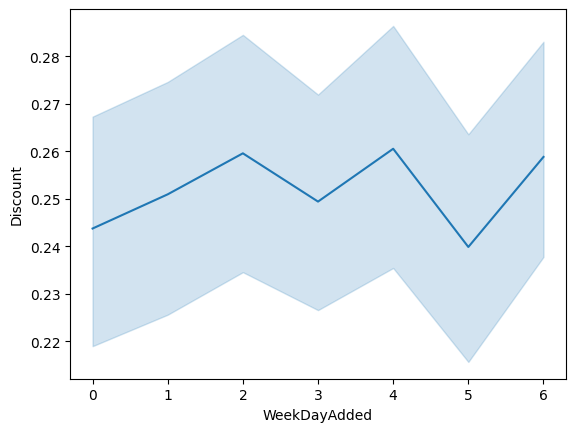

In [21]:
sns.lineplot(data=data, x='WeekDayAdded', y = 'Discount')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


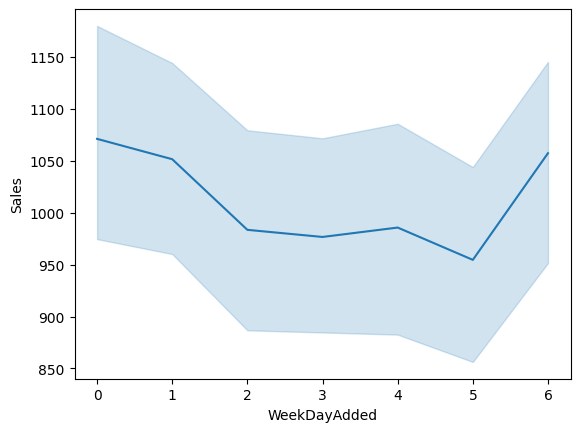

In [22]:
sns.lineplot(data=data, x='WeekDayAdded', y = 'Sales')
plt.show()

## Most popular items

                 Sales                    Category  NumReviews
ProductName                                                   
Biography        23947                       Books       52097
Mountain Bike    20069                    Bicycles       51767
Cleanser         15886                   Skin care       28059
Spark Plugs      15745         Motor vehicle parts       31406
Throw Blanket    15315                    Blankets       46092
Vitamin D        15239    Vitamins and supplements       42678
Headphones       15116                 Electronics       32118
Eau de Toilette  14820         Perfume and cologne       39615
Denim Jacket     14472           Coats and jackets       37787
Paint Set        14455  Art and crafting materials       24253


<Axes: xlabel='ProductName'>

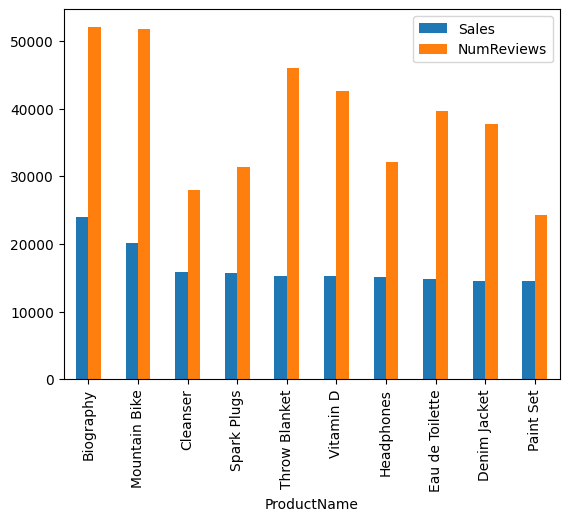

In [23]:
pop_items = data.groupby("ProductName").agg({'Sales':'sum','Category':'min','NumReviews':'sum'})
pop_items = pop_items.sort_values('Sales', ascending = False).head(10)
print(pop_items)
pop_items.plot(kind='bar')

## Popular Category

                            Sales  NumReviews
Category                                     
Bedsheets                   46631      106637
Art and crafting materials  45912       99231
Motor vehicle parts         45116      108193
Vitamins and supplements    44402       95375
Mobile phone accessories    43660      109286
Electronics                 42844       90617
Bicycles                    42750       96921
Bath and body               42454       81095
Makeup                      42337       97638
Toys & Games                42295      105116


<Axes: xlabel='Category'>

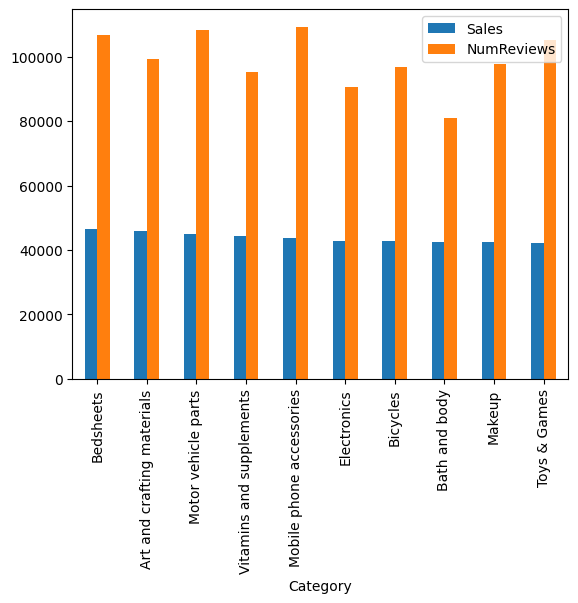

In [24]:
pop_cat = data.groupby("Category").agg({'Sales':'sum','NumReviews':'sum'})
pop_cat = pop_cat.sort_values('Sales',ascending = False).head(10)
print(pop_cat)
pop_cat.plot(kind='bar')